In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

In [ ]:
DATA_DIR = 'data'
OUTPUT_DIR = 'output'
os.makedirs(OUTPUT_DIR, exist_ok=True)

# List all Excel files
files = glob(os.path.join(DATA_DIR, '*.xlsx'))

for file_path in files:
    file_name = os.path.basename(file_path)
    print(f"Processing: {file_name}")
    
    # Load Excel
    df = pd.read_excel(file_path)
    
    # Filter heads
    head_df = df[df['Aname'].str.endswith('Head')]
    chris_head = head_df[head_df['Aname'].str.contains('BP_Chris_28')]
    pawn_head = head_df[head_df['Aname'].str.contains('myMRPawn')]

    # Merge on time
    merged = pd.merge(chris_head, pawn_head, on='time', suffixes=('_chris', '_pawn'))

    # Distance between heads
    merged['distance'] = np.sqrt(
        (merged['position_x_chris'] - merged['position_x_pawn'])**2 +
        (merged['position_y_chris'] - merged['position_y_pawn'])**2 +
        (merged['position_z_chris'] - merged['position_z_pawn'])**2
    )

    # Plot Distance
    plt.figure(figsize=(10, 4))
    plt.plot(merged['time'], merged['distance'], label='Head Distance')
    plt.xlabel('Time')
    plt.ylabel('Distance')
    plt.title(f'Distance Between Heads - {file_name}')
    plt.grid(True)
    plt.tight_layout()
    
    # Save plot
    output_path = os.path.join(OUTPUT_DIR, file_name.replace('.xlsx', '_distance.png'))
    plt.savefig(output_path)
    plt.close()
    print(f"Saved plot to: {output_path}")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

# --- CONFIGURATION --- #
DATA_FOLDER = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161"

OUTPUT_FOLDER = os.path.join(DATA_FOLDER, "output")
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# --- Load all Excel files above 5 KB --- #
excel_files = [f for f in glob(os.path.join(DATA_FOLDER, "*.xlsx")) if os.path.getsize(f) > 5 * 1024]

print(f"Found {len(excel_files)} files to process.")

for file_path in excel_files:
    file_name = os.path.basename(file_path)
    print(f"\n📄 Processing: {file_name}")

    try:
        df = pd.read_excel(file_path)

        # Validate required columns exist
        required_cols = {'time', 'position_x', 'position_y', 'position_z', 'rotation_yaw', 'rotation_pitch', 'rotation_roll', 'Aname'}
        if not required_cols.issubset(df.columns):
            print(f"⚠️ Skipping {file_name}: Missing required columns.")
            continue

        # Filter head data
        head_df = df[df['Aname'].str.endswith('Head', na=False)]
        chris_head = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
        pawn_head = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

        if chris_head.empty or pawn_head.empty:
            print(f"⚠️ Skipping {file_name}: No head data for one or both characters.")
            continue

        # Merge on time
        merged = pd.merge(chris_head, pawn_head, on='time', suffixes=('_chris', '_pawn'))
        if merged.empty:
            print(f"⚠️ Skipping {file_name}: No common timestamps.")
            continue

        # Compute Euclidean distance between heads
        merged['head_distance'] = np.sqrt(
            (merged['position_x_chris'] - merged['position_x_pawn'])**2 +
            (merged['position_y_chris'] - merged['position_y_pawn'])**2 +
            (merged['position_z_chris'] - merged['position_z_pawn'])**2
        )

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(merged['time'], merged['head_distance'], color='green')
        plt.title(f'Head Distance Over Time\n{file_name}', fontsize=10)
        plt.xlabel('Time')
        plt.ylabel('Distance')
        plt.grid(True)
        plt.tight_layout()

        # Save plot
        plot_path = os.path.join(OUTPUT_FOLDER, file_name.replace('.xlsx', '_head_distance.png'))
        plt.savefig(plot_path)
        plt.close()
        print(f"✅ Saved plot: {plot_path}")

    except Exception as e:
        print(f"❌ Error processing {file_name}: {e}")


Found 0 files to process.


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# --- CONFIGURATION --- #
DATA_FOLDER = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161"
OUTPUT_FOLDER = os.path.join(DATA_FOLDER, "output")
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# --- DEBUG: Show all file types --- #
all_files = glob(os.path.join(DATA_FOLDER, "*.*"))
print(f"\n🔍 All files in folder: {len(all_files)} total")
for f in all_files[:5]:
    print(" -", os.path.basename(f))

# --- Load only .xlsx files larger than 5KB --- #
raw_excel_files = glob(os.path.join(DATA_FOLDER, "*.xlsx"))
print(f"\n📄 .xlsx files found: {len(raw_excel_files)}")

excel_files = [f for f in raw_excel_files if os.path.getsize(f) > 5 * 1024]
print(f"✅ Excel files > 5 KB: {len(excel_files)}")

if not excel_files:
    print("⚠️ No valid Excel files found. Check path, file extensions, or size filter.")
else:
    print("\n📂 Starting processing...")

# --- Loop through files --- #
for file_path in excel_files:
    file_name = os.path.basename(file_path)
    print(f"\n🔧 Processing: {file_name}")

    try:
        df = pd.read_excel(file_path)

        # Required columns check
        required_cols = {
            'time', 'position_x', 'position_y', 'position_z',
            'rotation_yaw', 'rotation_pitch', 'rotation_roll', 'Aname'
        }

        if not required_cols.issubset(df.columns):
            print(f"❌ Skipped {file_name}: Missing required columns.")
            continue

        # Filter head data
        head_df = df[df['Aname'].str.endswith('Head', na=False)]
        chris_head = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
        pawn_head = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

        if chris_head.empty or pawn_head.empty:
            print(f"⚠️ Skipped {file_name}: No head data found for one or both characters.")
            continue

        # Merge on time
        merged = pd.merge(chris_head, pawn_head, on='time', suffixes=('_chris', '_pawn'))

        if merged.empty:
            print(f"⚠️ Skipped {file_name}: No common time entries to merge.")
            continue

        # Compute distance
        merged['head_distance'] = np.sqrt(
            (merged['position_x_chris'] - merged['position_x_pawn'])**2 +
            (merged['position_y_chris'] - merged['position_y_pawn'])**2 +
            (merged['position_z_chris'] - merged['position_z_pawn'])**2
        )

        # Plot distance
        plt.figure(figsize=(10, 4))
        plt.plot(merged['time'], merged['head_distance'], label='Head Distance', color='green')
        plt.title(f'Head Distance Over Time\n{file_name}', fontsize=10)
        plt.xlabel('Time')
        plt.ylabel('Distance (units)')
        plt.grid(True)
        plt.tight_layout()

        # Save plot
        output_path = os.path.join(OUTPUT_FOLDER, file_name.replace('.xlsx', '_head_distance.png'))
        plt.savefig(output_path)
        plt.close()

        print(f"✅ Plot saved to: {output_path}")

    except Exception as e:
        print(f"❌ Error processing {file_name}: {e}")



🔍 All files in folder: 66 total
 - eventData_2025-6-5_13161.json
 - PoseDataManager_rawdata_2025.06.05-14.33.22.csv
 - PoseDataManager_rawdata_2025.06.05-14.35.02.csv
 - PoseDataManager_rawdata_2025.06.05-14.36.43.csv
 - PoseDataManager_rawdata_2025.06.05-14.38.23.csv

📄 .xlsx files found: 0
✅ Excel files > 5 KB: 0
⚠️ No valid Excel files found. Check path, file extensions, or size filter.


In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# --- CONFIGURATION --- #
DATA_FOLDER = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161"
OUTPUT_FOLDER = os.path.join(DATA_FOLDER, "output")
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# --- DEBUG: List all files --- #
all_files = glob(os.path.join(DATA_FOLDER, "*.*"))
print(f"\n🔍 All files in folder: {len(all_files)} total")
for f in all_files[:5]:
    print(" -", os.path.basename(f))

# --- Load only .csv files larger than 5 KB --- #
raw_csv_files = glob(os.path.join(DATA_FOLDER, "*.csv"))
print(f"\n📄 .csv files found: {len(raw_csv_files)}")

csv_files = [f for f in raw_csv_files if os.path.getsize(f) >= 1 * 1024]
print(f"✅ CSV files > 1 KB: {len(csv_files)}")

if not csv_files:
    print("⚠️ No valid CSV files found. Check path, file extensions, or size filter.")
else:
    print("\n📂 Starting processing...")

# --- Loop through CSV files --- #
for file_path in csv_files:
    file_name = os.path.basename(file_path)
    print(f"\n🔧 Processing: {file_name}")

    try:
        df = pd.read_csv(file_path)

        # Required columns check
        required_cols = {
            'time', 'position_x', 'position_y', 'position_z',
            'rotation_yaw', 'rotation_pitch', 'rotation_roll', 'Aname'
        }

        if not required_cols.issubset(df.columns):
            print(f"❌ Skipped {file_name}: Missing required columns.")
            continue

        # Filter head data
        head_df = df[df['Aname'].str.endswith('Head', na=False)]
        chris_head = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
        pawn_head = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

        if chris_head.empty or pawn_head.empty:
            print(f"⚠️ Skipped {file_name}: No head data for one or both characters.")
            continue

        # Merge on time
        merged = pd.merge(chris_head, pawn_head, on='time', suffixes=('_chris', '_pawn'))

        if merged.empty:
            print(f"⚠️ Skipped {file_name}: No common timestamps.")
            continue

        # Compute Euclidean distance
        merged['head_distance'] = np.sqrt(
            (merged['position_x_chris'] - merged['position_x_pawn'])**2 +
            (merged['position_y_chris'] - merged['position_y_pawn'])**2 +
            (merged['position_z_chris'] - merged['position_z_pawn'])**2
        )

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(merged['time'], merged['head_distance'], color='green')
        plt.title(f'Head Distance Over Time\n{file_name}', fontsize=10)
        plt.xlabel('Time')
        plt.ylabel('Distance (units)')
        plt.grid(True)
        plt.tight_layout()

        # Save plot
        output_path = os.path.join(OUTPUT_FOLDER, file_name.replace('.csv', '_head_distance.png'))
        plt.savefig(output_path)
        plt.close()

        print(f"✅ Plot saved to: {output_path}")

    except Exception as e:
        print(f"❌ Error processing {file_name}: {e}")



🔍 All files in folder: 66 total
 - eventData_2025-6-5_13161.json
 - PoseDataManager_rawdata_2025.06.05-14.33.22.csv
 - PoseDataManager_rawdata_2025.06.05-14.35.02.csv
 - PoseDataManager_rawdata_2025.06.05-14.36.43.csv
 - PoseDataManager_rawdata_2025.06.05-14.38.23.csv

📄 .csv files found: 65
✅ CSV files > 1 KB: 34

📂 Starting processing...

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.33.22.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.33.22.csv: No head data for one or both characters.

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.35.02.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.35.02.csv: No head data for one or both characters.

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.36.43.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.36.43.csv: No head data for one or both characters.

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.38.23.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.38.23.csv: No head data for one or both characters.



In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

# --- CONFIGURATION --- #
DATA_FOLDER = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161"
OUTPUT_FOLDER = os.path.join(DATA_FOLDER, "output")
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

csv_files = glob(os.path.join(DATA_FOLDER, "*.csv"))

for file_path in csv_files:
    file_name = os.path.basename(file_path)
    print(f"\n🔧 Processing: {file_name}")

    try:
        df = pd.read_csv(file_path)

        # Filter head data
        head_df = df[df['Aname'].str.endswith('Head', na=False)]
        chris = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
        pawn = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

        if chris.empty or pawn.empty:
            print(f"⚠️ Skipped {file_name}: Missing head data.")
            continue

        merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))
        if merged.empty:
            print(f"⚠️ Skipped {file_name}: No common timestamps.")
            continue

        # HEAD DISTANCE
        merged['head_distance'] = np.sqrt(
            (merged['position_x_chris'] - merged['position_x_pawn'])**2 +
            (merged['position_y_chris'] - merged['position_y_pawn'])**2 +
            (merged['position_z_chris'] - merged['position_z_pawn'])**2
        )

        # --- PLOT 1: Head Distance ---
        plt.figure(figsize=(10, 4))
        plt.plot(merged['time'], merged['head_distance'], color='green')
        plt.title(f'Head Distance Over Time\n{file_name}', fontsize=10)
        plt.xlabel('Time')
        plt.ylabel('Distance (units)')
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_FOLDER, file_name.replace('.csv', '_head_distance.png')))
        plt.close()

        # --- PLOT 2: Orientation (Yaw, Pitch, Roll) ---
        for angle in ['yaw', 'pitch', 'roll']:
            plt.figure(figsize=(10, 4))
            plt.plot(merged['time'], merged[f'rotation_{angle}_chris'], label='Chris', color='blue')
            plt.plot(merged['time'], merged[f'rotation_{angle}_pawn'], label='MyPawn', color='orange')
            plt.title(f'Head {angle.capitalize()} Over Time\n{file_name}', fontsize=10)
            plt.xlabel('Time')
            plt.ylabel(f'{angle.capitalize()} (degrees)')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.savefig(os.path.join(OUTPUT_FOLDER, file_name.replace('.csv', f'_head_{angle}.png')))
            plt.close()

        # --- PLOT 3: 3D Trajectory of Heads ---
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(merged['position_x_chris'], merged['position_y_chris'], merged['position_z_chris'], label='Chris', color='blue')
        ax.plot(merged['position_x_pawn'], merged['position_y_pawn'], merged['position_z_pawn'], label='MyPawn', color='orange')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'3D Head Trajectory\n{file_name}', fontsize=10)
        ax.legend()
        plt.tight_layout()
        plt.savefig(os.path.join(OUTPUT_FOLDER, file_name.replace('.csv', '_head_3D_trajectory.png')))
        plt.close()

        print(f"✅ Plots saved for: {file_name}")

    except Exception as e:
        print(f"❌ Error in {file_name}: {e}")



🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.33.22.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.33.22.csv: Missing head data.

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.35.02.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.35.02.csv: Missing head data.

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.36.43.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.36.43.csv: Missing head data.

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.38.23.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.38.23.csv: Missing head data.

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.40.06.csv
✅ Plots saved for: PoseDataManager_rawdata_2025.06.05-14.40.06.csv

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.41.46.csv
✅ Plots saved for: PoseDataManager_rawdata_2025.06.05-14.41.46.csv

🔧 Processing: PoseDataManager_rawdata_2025.06.05-14.43.26.csv
✅ Plots saved for: PoseDataManager_rawdata_2025.06.05-14.43.26.csv

🔧 Processing: PoseDataManager_rawdata_202

🎥 Saving animation to C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06_3Danimation.mp4...


RuntimeError: Requested MovieWriter (ffmpeg) not available

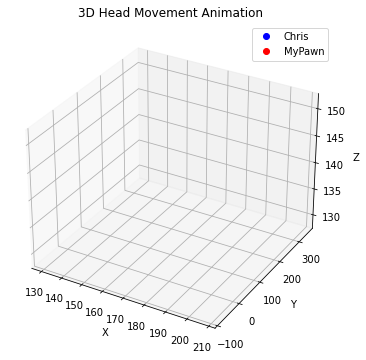

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# CONFIG
DATA_FILE = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06.csv"
OUTPUT_VIDEO = DATA_FILE.replace('.csv', '_3Danimation.mp4')

# Load data
df = pd.read_csv(DATA_FILE)

# Filter for heads
df_heads = df[df['Aname'].str.endswith('Head', na=False)]
chris = df_heads[df_heads['Aname'].str.contains('BP_Chris_28', na=False)]
pawn = df_heads[df_heads['Aname'].str.contains('myMRPawn', na=False)]

# Merge on time
merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))
if merged.empty:
    raise ValueError("No overlapping time data for Chris and MyPawn heads.")

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(merged[['position_x_chris', 'position_x_pawn']].values.min(), merged[['position_x_chris', 'position_x_pawn']].values.max())
ax.set_ylim(merged[['position_y_chris', 'position_y_pawn']].values.min(), merged[['position_y_chris', 'position_y_pawn']].values.max())
ax.set_zlim(merged[['position_z_chris', 'position_z_pawn']].values.min(), merged[['position_z_chris', 'position_z_pawn']].values.max())
ax.set_title("3D Head Movement Animation")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Elements to update
chris_dot, = ax.plot([], [], [], 'bo', label='Chris')
pawn_dot, = ax.plot([], [], [], 'ro', label='MyPawn')
line, = ax.plot([], [], [], 'gray', linestyle='--', alpha=0.3)
ax.legend()

# Determine "looking at each other"
def are_facing_each_other(row):
    yaw_chris = row['rotation_yaw_chris']
    yaw_pawn = row['rotation_yaw_pawn']
    vector = np.array([
        row['position_x_pawn'] - row['position_x_chris'],
        row['position_y_pawn'] - row['position_y_chris']
    ])
    angle_to_pawn = np.degrees(np.arctan2(vector[1], vector[0]))
    angle_diff = abs((yaw_chris - angle_to_pawn + 180) % 360 - 180)
    return angle_diff < 30  # within 30 degrees cone

# Animation update function
def update(frame):
    row = merged.iloc[frame]
    x1, y1, z1 = row['position_x_chris'], row['position_y_chris'], row['position_z_chris']
    x2, y2, z2 = row['position_x_pawn'], row['position_y_pawn'], row['position_z_pawn']

    chris_dot.set_data([x1], [y1])
    chris_dot.set_3d_properties([z1])
    pawn_dot.set_data([x2], [y2])
    pawn_dot.set_3d_properties([z2])
    line.set_data([x1, x2], [y1, y2])
    line.set_3d_properties([z1, z2])

    # Optional: color red if looking at each other
    if are_facing_each_other(row):
        chris_dot.set_color('magenta')
        pawn_dot.set_color('magenta')
    else:
        chris_dot.set_color('blue')
        pawn_dot.set_color('red')

    return chris_dot, pawn_dot, line

# Create animation
anim = animation.FuncAnimation(fig, update, frames=len(merged), interval=50, blit=False)

# Save animation as MP4
print(f"🎥 Saving animation to {OUTPUT_VIDEO}...")
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
anim.save(OUTPUT_VIDEO, writer=writer)
plt.close()
print("✅ Animation saved.")


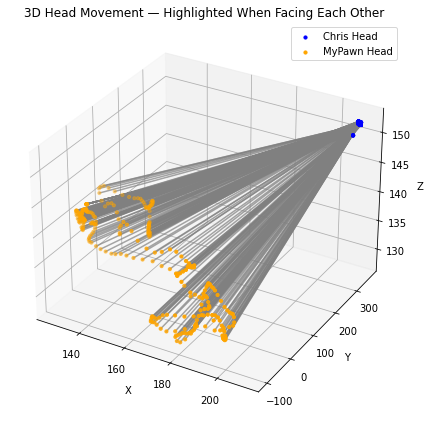

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

# --- CONFIG --- #
DATA_FILE = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06.csv"

df = pd.read_csv(DATA_FILE)

# Filter head data
head_df = df[df['Aname'].str.endswith('Head', na=False)]
chris = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
pawn = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))
if merged.empty:
    raise ValueError("No overlapping time data between heads.")

# Define function to check if they're facing each other
def facing_each_other(row, threshold=30):
    vec_c2p = np.array([
        row['position_x_pawn'] - row['position_x_chris'],
        row['position_y_pawn'] - row['position_y_chris']
    ])
    vec_p2c = -vec_c2p

    yaw_chris = row['rotation_yaw_chris']
    yaw_pawn = row['rotation_yaw_pawn']

    # Convert yaw to unit vectors
    dir_chris = np.array([np.cos(np.radians(yaw_chris)), np.sin(np.radians(yaw_chris))])
    dir_pawn  = np.array([np.cos(np.radians(yaw_pawn)), np.sin(np.radians(yaw_pawn))])

    # Cosine similarity (angle diff)
    cos_sim_chris = np.dot(dir_chris, vec_c2p) / (np.linalg.norm(dir_chris) * np.linalg.norm(vec_c2p))
    cos_sim_pawn = np.dot(dir_pawn, vec_p2c) / (np.linalg.norm(dir_pawn) * np.linalg.norm(vec_p2c))

    # Convert to degrees
    angle_chris = np.degrees(np.arccos(np.clip(cos_sim_chris, -1.0, 1.0)))
    angle_pawn = np.degrees(np.arccos(np.clip(cos_sim_pawn, -1.0, 1.0)))

    return angle_chris < threshold and angle_pawn < threshold

# Apply to each row
merged['is_facing'] = merged.apply(facing_each_other, axis=1)

# --- 3D Plot --- #
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Head Movement — Highlighted When Facing Each Other")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Plot all lines
for _, row in merged.iterrows():
    x_vals = [row['position_x_chris'], row['position_x_pawn']]
    y_vals = [row['position_y_chris'], row['position_y_pawn']]
    z_vals = [row['position_z_chris'], row['position_z_pawn']]
    color = 'red' if row['is_facing'] else 'gray'
    ax.plot(x_vals, y_vals, z_vals, color=color, alpha=0.7)

# Plot points
ax.scatter(merged['position_x_chris'], merged['position_y_chris'], merged['position_z_chris'],
           label='Chris Head', color='blue', s=10)
ax.scatter(merged['position_x_pawn'], merged['position_y_pawn'], merged['position_z_pawn'],
           label='MyPawn Head', color='orange', s=10)

ax.legend()
plt.tight_layout()
plt.show()


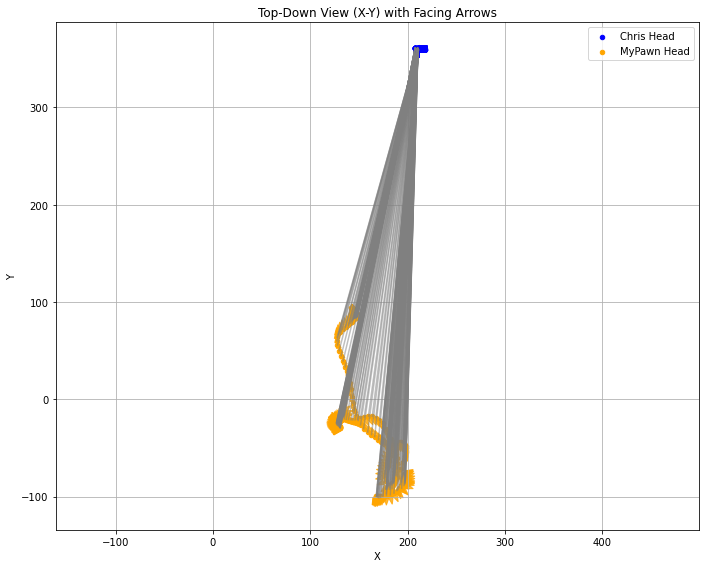

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- CONFIG --- #
DATA_FILE = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06.csv"

# Load data
df = pd.read_csv(DATA_FILE)

# Filter heads
head_df = df[df['Aname'].str.endswith('Head', na=False)]
chris = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
pawn = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))

if merged.empty:
    raise ValueError("No overlapping head data")

# Define facing check
def facing_each_other(row, threshold=30):
    vec_c2p = np.array([
        row['position_x_pawn'] - row['position_x_chris'],
        row['position_y_pawn'] - row['position_y_chris']
    ])
    vec_p2c = -vec_c2p

    yaw_chris = row['rotation_yaw_chris']
    yaw_pawn = row['rotation_yaw_pawn']

    dir_chris = np.array([np.cos(np.radians(yaw_chris)), np.sin(np.radians(yaw_chris))])
    dir_pawn  = np.array([np.cos(np.radians(yaw_pawn)), np.sin(np.radians(yaw_pawn))])

    cos_sim_chris = np.dot(dir_chris, vec_c2p) / (np.linalg.norm(dir_chris) * np.linalg.norm(vec_c2p))
    cos_sim_pawn  = np.dot(dir_pawn, vec_p2c)  / (np.linalg.norm(dir_pawn) * np.linalg.norm(vec_p2c))

    angle_chris = np.degrees(np.arccos(np.clip(cos_sim_chris, -1.0, 1.0)))
    angle_pawn  = np.degrees(np.arccos(np.clip(cos_sim_pawn, -1.0, 1.0)))

    return angle_chris < threshold and angle_pawn < threshold

# Apply facing flag
merged['is_facing'] = merged.apply(facing_each_other, axis=1)

# --- Plot Top-Down 2D View with Arrows --- #
plt.figure(figsize=(10, 8))
plt.title("Top-Down View (X-Y) with Facing Arrows")

for i, row in merged.iterrows():
    # Get positions
    x_c, y_c = row['position_x_chris'], row['position_y_chris']
    x_p, y_p = row['position_x_pawn'], row['position_y_pawn']

    # Draw line between them
    line_color = 'red' if row['is_facing'] else 'gray'
    plt.plot([x_c, x_p], [y_c, y_p], color=line_color, alpha=0.5)

    # Draw facing direction arrows
    yaw_c = np.radians(row['rotation_yaw_chris'])
    yaw_p = np.radians(row['rotation_yaw_pawn'])

    dx_c, dy_c = np.cos(yaw_c), np.sin(yaw_c)
    dx_p, dy_p = np.cos(yaw_p), np.sin(yaw_p)

    plt.arrow(x_c, y_c, dx_c*10, dy_c*10, head_width=5, color='blue', alpha=0.8, length_includes_head=True)
    plt.arrow(x_p, y_p, dx_p*10, dy_p*10, head_width=5, color='orange', alpha=0.8, length_includes_head=True)

# Plot static dots for heads
plt.scatter(merged['position_x_chris'], merged['position_y_chris'], color='blue', label='Chris Head', s=20)
plt.scatter(merged['position_x_pawn'], merged['position_y_pawn'], color='orange', label='MyPawn Head', s=20)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.tight_layout()
plt.show()


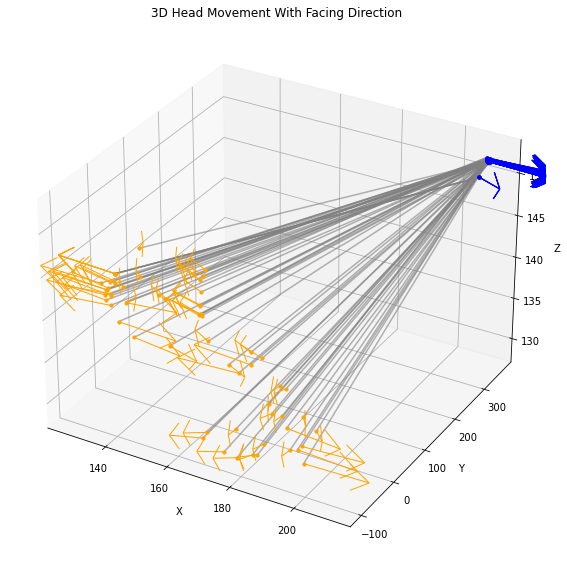

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# --- CONFIG --- #
DATA_FILE = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06.csv"

df = pd.read_csv(DATA_FILE)

# Filter head data
head_df = df[df['Aname'].str.endswith('Head', na=False)]
chris = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
pawn = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))
if merged.empty:
    raise ValueError("No overlapping time data.")

# Check if facing each other (based on yaw)
def facing_each_other(row, threshold=30):
    vec_c2p = np.array([
        row['position_x_pawn'] - row['position_x_chris'],
        row['position_y_pawn'] - row['position_y_chris']
    ])
    vec_p2c = -vec_c2p

    yaw_chris = row['rotation_yaw_chris']
    yaw_pawn = row['rotation_yaw_pawn']

    dir_chris = np.array([np.cos(np.radians(yaw_chris)), np.sin(np.radians(yaw_chris))])
    dir_pawn  = np.array([np.cos(np.radians(yaw_pawn)), np.sin(np.radians(yaw_pawn))])

    cos_sim_chris = np.dot(dir_chris, vec_c2p) / (np.linalg.norm(dir_chris) * np.linalg.norm(vec_c2p))
    cos_sim_pawn  = np.dot(dir_pawn, vec_p2c) / (np.linalg.norm(dir_pawn) * np.linalg.norm(vec_p2c))

    angle_chris = np.degrees(np.arccos(np.clip(cos_sim_chris, -1.0, 1.0)))
    angle_pawn  = np.degrees(np.arccos(np.clip(cos_sim_pawn, -1.0, 1.0)))

    return angle_chris < threshold and angle_pawn < threshold

merged['is_facing'] = merged.apply(facing_each_other, axis=1)

# --- PLOT 3D --- #
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Head Movement With Facing Direction", fontsize=12)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Plot points and lines with arrows
arrow_length = 20
skip = 5  # skip every few frames to reduce clutter

for i, row in merged[::skip].iterrows():
    x_c, y_c, z_c = row['position_x_chris'], row['position_y_chris'], row['position_z_chris']
    x_p, y_p, z_p = row['position_x_pawn'], row['position_y_pawn'], row['position_z_pawn']

    # Line connecting heads
    color = 'red' if row['is_facing'] else 'gray'
    ax.plot([x_c, x_p], [y_c, y_p], [z_c, z_p], color=color, alpha=0.6)

    # Plot head positions
    ax.scatter(x_c, y_c, z_c, color='blue', s=10)
    ax.scatter(x_p, y_p, z_p, color='orange', s=10)

    # Plot facing direction (yaw only — X/Y plane)
    yaw_c = np.radians(row['rotation_yaw_chris'])
    yaw_p = np.radians(row['rotation_yaw_pawn'])

    dx_c, dy_c = np.cos(yaw_c) * arrow_length, np.sin(yaw_c) * arrow_length
    dx_p, dy_p = np.cos(yaw_p) * arrow_length, np.sin(yaw_p) * arrow_length

    # Draw arrows in XY plane, fixed Z
    ax.quiver(x_c, y_c, z_c, dx_c, dy_c, 0, color='blue', arrow_length_ratio=0.3, linewidth=1)
    ax.quiver(x_p, y_p, z_p, dx_p, dy_p, 0, color='orange', arrow_length_ratio=0.3, linewidth=1)

plt.tight_layout()
plt.show()


In [13]:
def facing_each_other(row, yaw_threshold=60, pitch_threshold=30):
    yaw_diff = abs(row['yaw_A'] - row['yaw_B']) % 360
    pitch_diff = abs(row['pitch_A'] - row['pitch_B'])
    
    # Normalize yaw to within 0–180
    yaw_diff = min(yaw_diff, 360 - yaw_diff)

    facing = yaw_diff < yaw_threshold and pitch_diff < pitch_threshold
    return facing


In [15]:
log_df = merged[['time', 'rotation_yaw_chris', 'rotation_pitch_chris',
                 'rotation_yaw_pawn', 'rotation_pitch_pawn']].copy()
log_df.columns = ['time', 'yaw_A', 'pitch_A', 'yaw_B', 'pitch_B']  # rename for consistency

log_df['yaw_diff'] = abs(log_df['yaw_A'] - log_df['yaw_B']) % 360
log_df['yaw_diff'] = log_df['yaw_diff'].apply(lambda d: min(d, 360 - d))
log_df['pitch_diff'] = abs(log_df['pitch_A'] - log_df['pitch_B'])
log_df['is_facing'] = merged.apply(lambda row: facing_each_other(row), axis=1)

# Save log
log_df.to_csv("output/head_direction_log.csv", index=False)
print("📄 Saved detailed yaw/pitch log to output/head_direction_log.csv")


KeyError: 'yaw_A'

✅ Saved yaw/pitch log → output/head_direction_log.csv


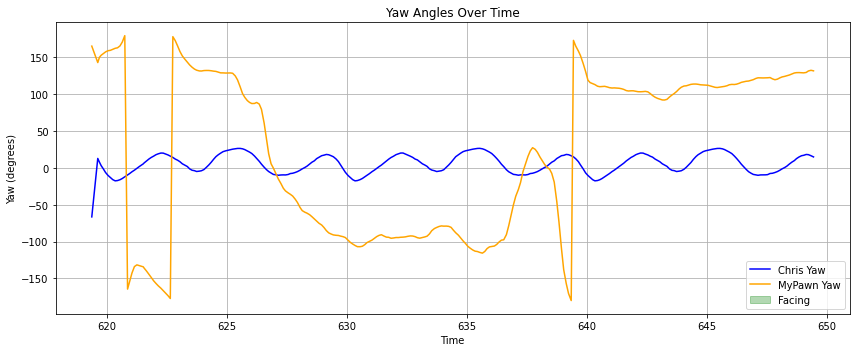

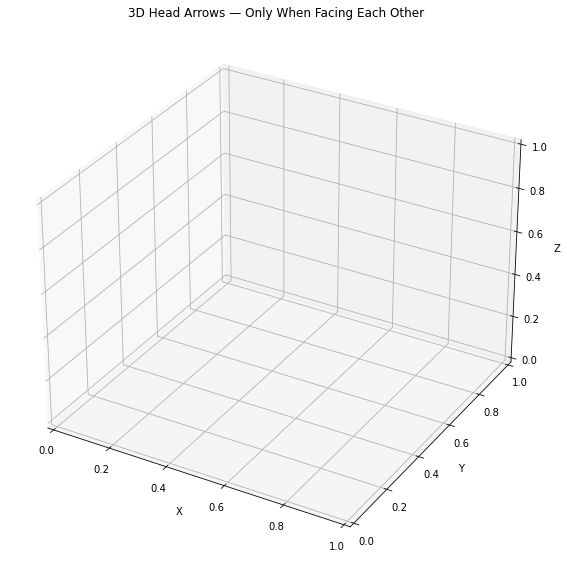

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# -- CONFIG --
FILE = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06.csv"
os.makedirs("output", exist_ok=True)

# -- LOAD DATA --
df = pd.read_csv(FILE)

# Filter head rows
head_df = df[df['Aname'].str.endswith('Head', na=False)]
chris = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
pawn = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

# Merge by time
merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))
if merged.empty:
    raise ValueError("❌ No matching head data between Chris and MyPawn.")

# -- Create log_df with clean names --
log_df = merged[['time', 'rotation_yaw_chris', 'rotation_pitch_chris',
                 'rotation_yaw_pawn', 'rotation_pitch_pawn']].copy()
log_df.columns = ['time', 'yaw_A', 'pitch_A', 'yaw_B', 'pitch_B']

# -- Facing logic --
def facing_each_other(row, yaw_threshold=60, pitch_threshold=30):
    yaw_diff = abs(row['yaw_A'] - row['yaw_B']) % 360
    yaw_diff = min(yaw_diff, 360 - yaw_diff)
    pitch_diff = abs(row['pitch_A'] - row['pitch_B'])
    return yaw_diff < yaw_threshold and pitch_diff < pitch_threshold

# -- Apply and log --
log_df['yaw_diff'] = abs(log_df['yaw_A'] - log_df['yaw_B']) % 360
log_df['yaw_diff'] = log_df['yaw_diff'].apply(lambda d: min(d, 360 - d))
log_df['pitch_diff'] = abs(log_df['pitch_A'] - log_df['pitch_B'])
log_df['is_facing'] = log_df.apply(facing_each_other, axis=1)

# Save log
log_df.to_csv("output/head_direction_log.csv", index=False)
print("✅ Saved yaw/pitch log → output/head_direction_log.csv")

# -- Plot 1: Yaw over time --
plt.figure(figsize=(12, 5))
plt.plot(log_df['time'], log_df['yaw_A'], label='Chris Yaw', color='blue')
plt.plot(log_df['time'], log_df['yaw_B'], label='MyPawn Yaw', color='orange')
plt.fill_between(log_df['time'], log_df['yaw_A'], log_df['yaw_B'],
                 where=log_df['is_facing'], color='green', alpha=0.3, label='Facing')
plt.title("Yaw Angles Over Time")
plt.xlabel("Time")
plt.ylabel("Yaw (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("output/yaw_comparison.png", dpi=300)
plt.show()

# -- Plot 2: 3D Arrows when facing --
facing_rows = merged[log_df['is_facing']].copy()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Head Arrows — Only When Facing Each Other")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

arrow_len = 15
for _, row in facing_rows.iterrows():
    x1, y1, z1 = row['position_x_chris'], row['position_y_chris'], row['position_z_chris']
    x2, y2, z2 = row['position_x_pawn'], row['position_y_pawn'], row['position_z_pawn']
    # Arrows from yaw only
    yaw1 = np.radians(row['rotation_yaw_chris'])
    yaw2 = np.radians(row['rotation_yaw_pawn'])
    dx1, dy1 = np.cos(yaw1), np.sin(yaw1)
    dx2, dy2 = np.cos(yaw2), np.sin(yaw2)
    
    # Head positions
    ax.scatter(x1, y1, z1, color='blue', s=20)
    ax.scatter(x2, y2, z2, color='orange', s=20)

    # Facing arrows
    ax.quiver(x1, y1, z1, dx1, dy1, 0, color='blue', length=arrow_len, arrow_length_ratio=0.3)
    ax.quiver(x2, y2, z2, dx2, dy2, 0, color='orange', length=arrow_len, arrow_length_ratio=0.3)

    # Connect heads
    ax.plot([x1, x2], [y1, y2], [z1, z2], color='red', linewidth=1.5)

plt.tight_layout()
plt.savefig("output/3d_head_facing_plot.png", dpi=300)
plt.show()


In [17]:
log_df['is_facing'].value_counts()


False    319
Name: is_facing, dtype: int64

In [18]:
log_df['is_facing'] = log_df.apply(lambda row: facing_each_other(row, yaw_threshold=90, pitch_threshold=45), axis=1)


In [20]:
log_df.to_csv("output/head_direction_log.csv", index=False)


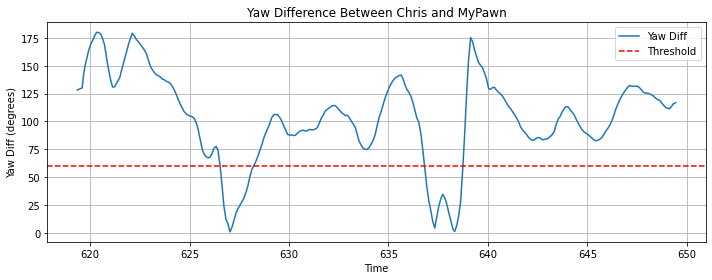

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(log_df['time'], log_df['yaw_diff'], label='Yaw Diff')
plt.axhline(60, color='red', linestyle='--', label='Threshold')
plt.xlabel("Time")
plt.ylabel("Yaw Diff (degrees)")
plt.title("Yaw Difference Between Chris and MyPawn")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Log saved to: output/head_direction_log_face_to_face.csv
🧭 Timestamps where they are facing each other:
[]


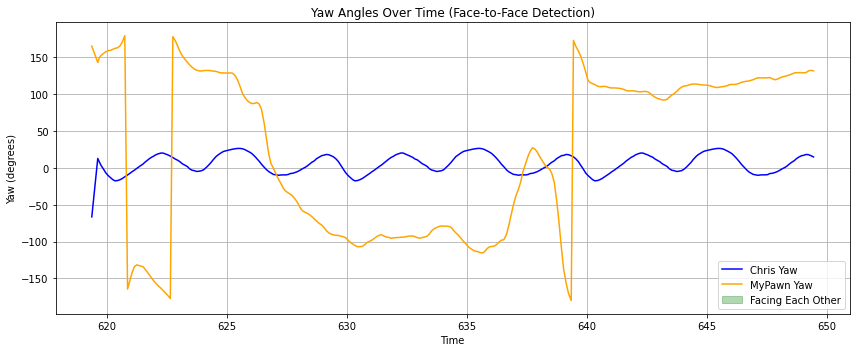

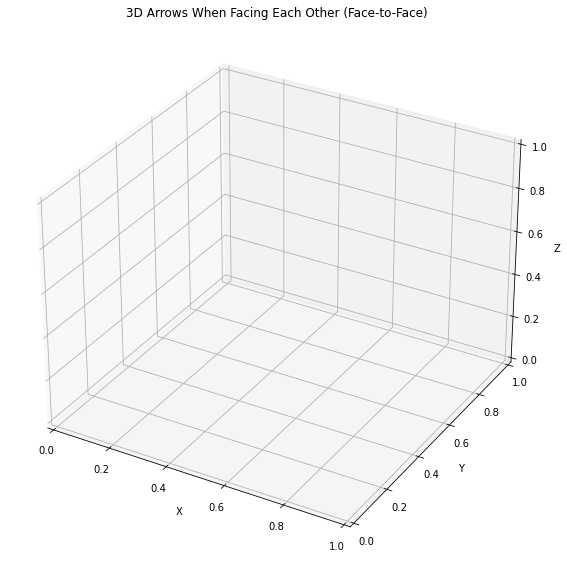

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# -------- CONFIG --------
FILE = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06.csv"
os.makedirs("output", exist_ok=True)

# -------- LOAD DATA --------
df = pd.read_csv(FILE)

# Keep only head rows
head_df = df[df['Aname'].str.endswith('Head', na=False)]
chris = head_df[head_df['Aname'].str.contains('BP_Chris_28', na=False)]
pawn = head_df[head_df['Aname'].str.contains('myMRPawn', na=False)]

# Merge both characters by time
merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))
if merged.empty:
    raise ValueError("❌ No matching head data found between Chris and MyPawn.")

# -------- CREATE LOG DF --------
log_df = merged[['time', 'rotation_yaw_chris', 'rotation_pitch_chris',
                 'rotation_yaw_pawn', 'rotation_pitch_pawn']].copy()
log_df.columns = ['time', 'yaw_A', 'pitch_A', 'yaw_B', 'pitch_B']

# -------- FACE-TO-FACE LOGIC --------
def facing_each_other(row, yaw_threshold=60, pitch_threshold=30):
    opposite_yaw_B = (row['yaw_B'] + 180) % 360  # reverse yaw
    yaw_diff = abs(row['yaw_A'] - opposite_yaw_B) % 360
    yaw_diff = min(yaw_diff, 360 - yaw_diff)
    pitch_diff = abs(row['pitch_A'] - row['pitch_B'])
    return yaw_diff < yaw_threshold and pitch_diff < pitch_threshold

# Compute yaw/pitch diffs
log_df['yaw_diff'] = abs(log_df['yaw_A'] - ((log_df['yaw_B'] + 180) % 360)) % 360
log_df['yaw_diff'] = log_df['yaw_diff'].apply(lambda d: min(d, 360 - d))
log_df['pitch_diff'] = abs(log_df['pitch_A'] - log_df['pitch_B'])
log_df['is_facing'] = log_df.apply(facing_each_other, axis=1)

# Save log
log_df.to_csv("output/head_direction_log_face_to_face.csv", index=False)
print("✅ Log saved to: output/head_direction_log_face_to_face.csv")

# Show timestamps
facing_times = log_df[log_df['is_facing']]['time'].tolist()
print("🧭 Timestamps where they are facing each other:")
print(facing_times)

# -------- PLOT 1: Yaw Over Time --------
plt.figure(figsize=(12, 5))
plt.plot(log_df['time'], log_df['yaw_A'], label='Chris Yaw', color='blue')
plt.plot(log_df['time'], log_df['yaw_B'], label='MyPawn Yaw', color='orange')
plt.fill_between(log_df['time'], log_df['yaw_A'], log_df['yaw_B'],
                 where=log_df['is_facing'], color='green', alpha=0.3, label='Facing Each Other')
plt.xlabel("Time")
plt.ylabel("Yaw (degrees)")
plt.title("Yaw Angles Over Time (Face-to-Face Detection)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("output/yaw_facing_face_to_face.png", dpi=300)
plt.show()

# -------- PLOT 2: 3D Arrows --------
facing_rows = merged[log_df['is_facing']].copy()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Arrows When Facing Each Other (Face-to-Face)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

arrow_len = 15
for _, row in facing_rows.iterrows():
    x1, y1, z1 = row['position_x_chris'], row['position_y_chris'], row['position_z_chris']
    x2, y2, z2 = row['position_x_pawn'], row['position_y_pawn'], row['position_z_pawn']
    
    # Arrow directions based on yaw
    yaw1 = np.radians(row['rotation_yaw_chris'])
    yaw2 = np.radians(row['rotation_yaw_pawn'])
    dx1, dy1 = np.cos(yaw1), np.sin(yaw1)
    dx2, dy2 = np.cos(yaw2), np.sin(yaw2)

    ax.scatter(x1, y1, z1, color='blue', s=20)
    ax.scatter(x2, y2, z2, color='orange', s=20)
    
    # Yaw arrows
    ax.quiver(x1, y1, z1, dx1, dy1, 0, color='blue', length=arrow_len, arrow_length_ratio=0.3)
    ax.quiver(x2, y2, z2, dx2, dy2, 0, color='orange', length=arrow_len, arrow_length_ratio=0.3)

    # Connection line
    ax.plot([x1, x2], [y1, y2], [z1, z2], color='red', linewidth=1.5)

plt.tight_layout()
plt.savefig("output/3d_face_to_face_plot.png", dpi=300)
plt.show()



<ipython-input-25-e246cf1ca9c5>:61: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(dx**2 + dy**2 + dz**2) / dt
<ipython-input-25-e246cf1ca9c5>:61: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(dx**2 + dy**2 + dz**2) / dt
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129504 missing from current font.
  font.set_text(s, 0, flags=flags)


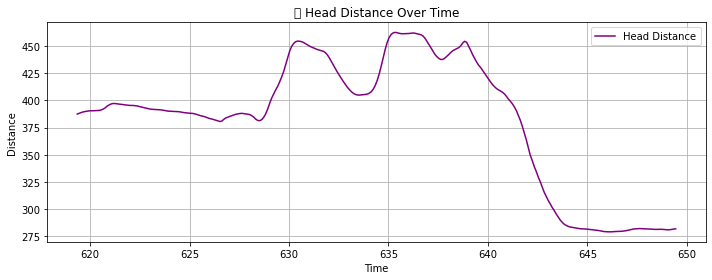

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0, flags=flags)


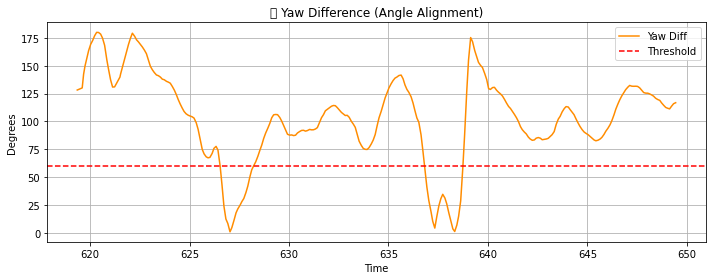

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0, flags=flags)


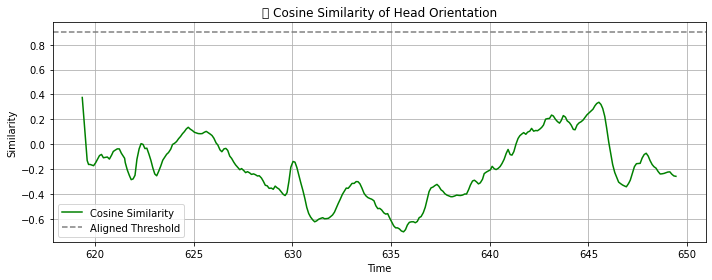

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9201 missing from current font.
  font.set_text(s, 0, flags=flags)


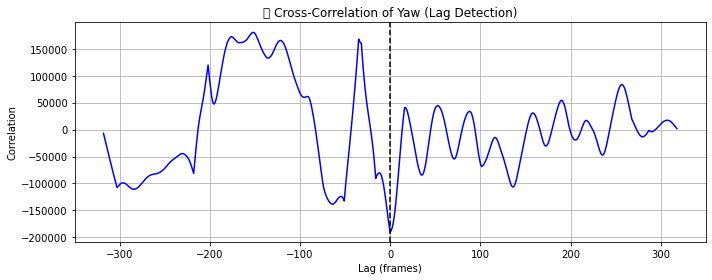

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127939 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127939 missing from current font.
  font.set_text(s, 0, flags=flags)


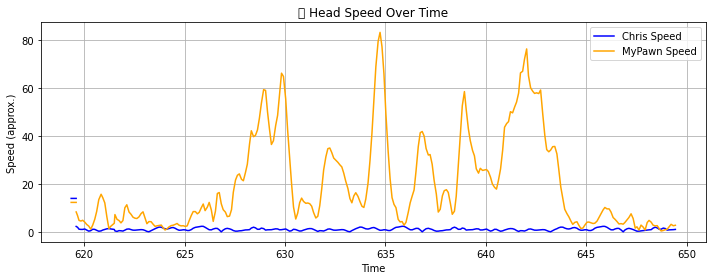

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0, flags=flags)


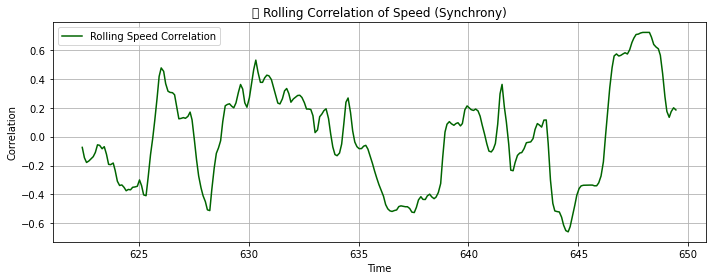

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import correlate
from scipy.spatial.distance import cosine

# --- Load CSV and filter head data ---
FILE = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161\PoseDataManager_rawdata_2025.06.05-14.40.06.csv"
df = pd.read_csv(FILE)

os.makedirs("output", exist_ok=True)

head_df = df[df['Aname'].str.endswith('Head', na=False)]
chris = head_df[head_df['Aname'].str.contains('BP_Chris_28')]
pawn = head_df[head_df['Aname'].str.contains('myMRPawn')]

merged = pd.merge(chris, pawn, on='time', suffixes=('_chris', '_pawn'))
if merged.empty:
    raise ValueError("❌ No matching head data between Chris and MyPawn.")

# --- Head Distance ---
merged['head_dist'] = np.sqrt(
    (merged['position_x_chris'] - merged['position_x_pawn'])**2 +
    (merged['position_y_chris'] - merged['position_y_pawn'])**2 +
    (merged['position_z_chris'] - merged['position_z_pawn'])**2
)

# --- Yaw Difference (circular) ---
yaw_diff = abs(merged['rotation_yaw_chris'] - merged['rotation_yaw_pawn']) % 360
merged['yaw_diff'] = yaw_diff.apply(lambda x: min(x, 360 - x))

# --- Cosine Similarity from Yaw + Pitch ---
def yaw_pitch_to_vector(yaw, pitch):
    yaw_rad = np.radians(yaw)
    pitch_rad = np.radians(pitch)
    x = np.cos(pitch_rad) * np.cos(yaw_rad)
    y = np.cos(pitch_rad) * np.sin(yaw_rad)
    z = np.sin(pitch_rad)
    return np.array([x, y, z])

merged['cosine_sim'] = merged.apply(lambda row:
    1 - cosine(
        yaw_pitch_to_vector(row['rotation_yaw_chris'], row['rotation_pitch_chris']),
        yaw_pitch_to_vector(row['rotation_yaw_pawn'], row['rotation_pitch_pawn'])
    ), axis=1
)

# --- Cross-Correlation of Yaw (Lag Analysis) ---
yaw_chris = merged['rotation_yaw_chris'].values
yaw_pawn = merged['rotation_yaw_pawn'].values
cross_corr = correlate(yaw_chris - np.mean(yaw_chris), yaw_pawn - np.mean(yaw_pawn), mode='full')
lags = np.arange(-len(yaw_chris) + 1, len(yaw_chris))

# --- Speed Correlation (simple velocity approximation) ---
def compute_speed(pos, time):
    dt = np.gradient(time)
    dx = np.gradient(pos[:, 0])
    dy = np.gradient(pos[:, 1])
    dz = np.gradient(pos[:, 2])
    return np.sqrt(dx**2 + dy**2 + dz**2) / dt

time = merged['time'].values
pos_chris = merged[['position_x_chris', 'position_y_chris', 'position_z_chris']].values
pos_pawn = merged[['position_x_pawn', 'position_y_pawn', 'position_z_pawn']].values

merged['speed_chris'] = compute_speed(pos_chris, time)
merged['speed_pawn'] = compute_speed(pos_pawn, time)

# Rolling window correlation
rolling_corr = merged['speed_chris'].rolling(30).corr(merged['speed_pawn'])

# ====================
# === VISUALIZATIONS ==
# ====================

plt.figure(figsize=(10, 4))
plt.plot(merged['time'], merged['head_dist'], label="Head Distance", color='purple')
plt.title("🧠 Head Distance Over Time")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("output/sync_head_distance.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(merged['time'], merged['yaw_diff'], label="Yaw Diff", color='darkorange')
plt.axhline(60, color='red', linestyle='--', label='Threshold')
plt.title("🔁 Yaw Difference (Angle Alignment)")
plt.xlabel("Time")
plt.ylabel("Degrees")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("output/sync_yaw_diff.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(merged['time'], merged['cosine_sim'], label="Cosine Similarity", color='green')
plt.axhline(0.9, linestyle='--', color='gray', label="Aligned Threshold")
plt.title("🧭 Cosine Similarity of Head Orientation")
plt.xlabel("Time")
plt.ylabel("Similarity")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("output/sync_cosine_similarity.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(lags, cross_corr, color='blue')
plt.axvline(0, linestyle='--', color='black')
plt.title("⏱️ Cross-Correlation of Yaw (Lag Detection)")
plt.xlabel("Lag (frames)")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.savefig("output/sync_cross_correlation_yaw.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(merged['time'], merged['speed_chris'], label="Chris Speed", color='blue')
plt.plot(merged['time'], merged['speed_pawn'], label="MyPawn Speed", color='orange')
plt.title("🏃 Head Speed Over Time")
plt.xlabel("Time")
plt.ylabel("Speed (approx.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("output/sync_head_speed.png", dpi=300)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(merged['time'], rolling_corr, label="Rolling Speed Correlation", color='darkgreen')
plt.title("🔁 Rolling Correlation of Speed (Synchrony)")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("output/sync_speed_rolling_corr.png", dpi=300)
plt.show()


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0, flags=flags)


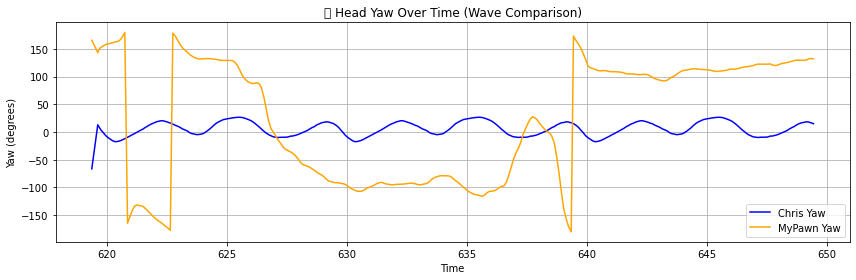

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127939 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127939 missing from current font.
  font.set_text(s, 0, flags=flags)


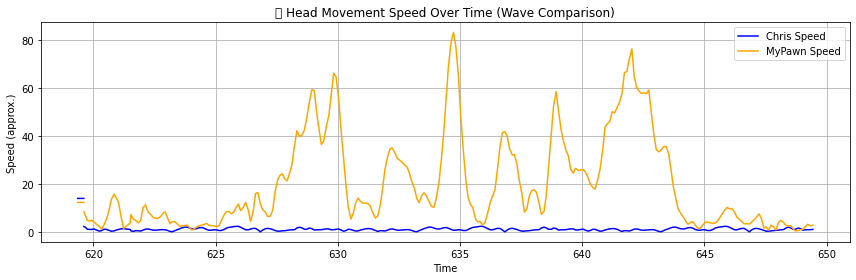

In [26]:
import matplotlib.pyplot as plt

# --- Wave Plot 1: Yaw angles ---
plt.figure(figsize=(12, 4))
plt.plot(merged['time'], merged['rotation_yaw_chris'], label='Chris Yaw', color='blue')
plt.plot(merged['time'], merged['rotation_yaw_pawn'], label='MyPawn Yaw', color='orange')
plt.title("🔁 Head Yaw Over Time (Wave Comparison)")
plt.xlabel("Time")
plt.ylabel("Yaw (degrees)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("output/sync_wave_yaw.png", dpi=300)
plt.show()

# --- Wave Plot 2: Speed waves ---
plt.figure(figsize=(12, 4))
plt.plot(merged['time'], merged['speed_chris'], label='Chris Speed', color='blue')
plt.plot(merged['time'], merged['speed_pawn'], label='MyPawn Speed', color='orange')
plt.title("🏃 Head Movement Speed Over Time (Wave Comparison)")
plt.xlabel("Time")
plt.ylabel("Speed (approx.)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("output/sync_wave_speed.png", dpi=300)
plt.show()


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0, flags=flags)


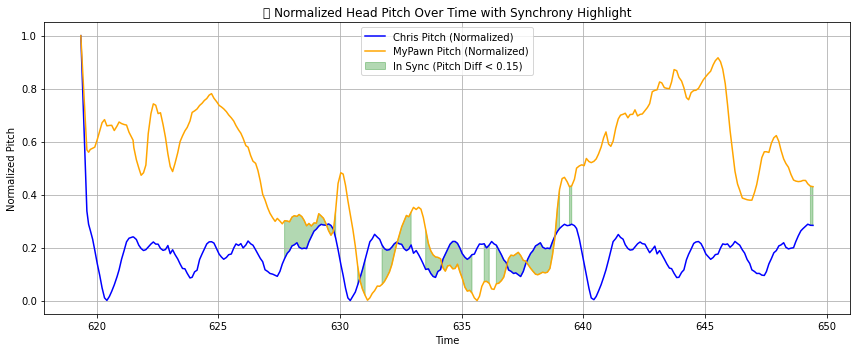

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# --- Normalize pitch signals to [0, 1] range ---
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize pitch for both
pitch_chris = normalize(merged['rotation_pitch_chris'])
pitch_pawn = normalize(merged['rotation_pitch_pawn'])
time = merged['time']

# Compute absolute pitch difference (for shading)
pitch_diff = np.abs(pitch_chris - pitch_pawn)
sync_threshold = 0.15  # below this = consider "synchronous"
in_sync = pitch_diff < sync_threshold

# --- Plot: Pitch synchrony wave ---
plt.figure(figsize=(12, 5))
plt.plot(time, pitch_chris, label='Chris Pitch (Normalized)', color='blue')
plt.plot(time, pitch_pawn, label='MyPawn Pitch (Normalized)', color='orange')

# Fill where synchronized
plt.fill_between(time, pitch_chris, pitch_pawn,
                 where=in_sync, color='green', alpha=0.3,
                 label='In Sync (Pitch Diff < 0.15)')

plt.title("🎚 Normalized Head Pitch Over Time with Synchrony Highlight")
plt.xlabel("Time")
plt.ylabel("Normalized Pitch")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("output/sync_wave_pitch_highlight.png", dpi=300)
plt.show()


In [28]:
# Already computed earlier:
# pitch_chris, pitch_pawn (normalized)
pitch_diff = np.abs(pitch_chris - pitch_pawn)
sync_threshold = 0.15
in_sync = pitch_diff < sync_threshold

# Compute synchrony %
sync_percentage = np.mean(in_sync) * 100
print(f"✅ Pitch Synchrony: {sync_percentage:.2f}% of the session")


✅ Pitch Synchrony: 34.17% of the session


In [29]:
import matplotlib.animation as animation
from matplotlib import rcParams

rcParams['animation.html'] = 'jshtml'

fig, ax = plt.subplots(figsize=(10, 4))
line1, = ax.plot([], [], label='Chris Pitch', color='blue')
line2, = ax.plot([], [], label='MyPawn Pitch', color='orange')
fill = ax.fill_between([], [], [], color='green', alpha=0.3)

ax.set_xlim(time.min(), time.max())
ax.set_ylim(0, 1)
ax.set_title("🎞️ Animated Pitch Synchrony")
ax.set_xlabel("Time")
ax.set_ylabel("Normalized Pitch")
ax.legend()
ax.grid(True)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2, fill

def animate(i):
    x = time[:i]
    y1 = pitch_chris[:i]
    y2 = pitch_pawn[:i]
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    ax.collections.clear()
    ax.fill_between(x, y1, y2, where=(np.abs(y1 - y2) < sync_threshold), color='green', alpha=0.3)
    return line1, line2

ani = animation.FuncAnimation(fig, animate, frames=len(time), init_func=init,
                              interval=30, blit=True)

ani.save("output/pitch_sync_animation.gif", writer='pillow', fps=30)
plt.close()
print("✅ Animated pitch synchrony saved as: output/pitch_sync_animation.gif")


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127902 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127902 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127902 missing from current font.
  font.set_text(s, 0, flags=flags)


✅ Animated pitch synchrony saved as: output/pitch_sync_animation.gif


In [30]:
summary = {
    "Pitch Synchrony (%)": sync_percentage,
    "Avg Head Distance": merged['head_dist'].mean(),
    "Avg Yaw Diff (deg)": merged['yaw_diff'].mean(),
    "Avg Cosine Similarity": merged['cosine_sim'].mean(),
    "Avg Speed Corr (window=30)": rolling_corr.mean()
}
summary_df = pd.DataFrame([summary])

print(summary_df)


   Pitch Synchrony (%)  Avg Head Distance  Avg Yaw Diff (deg)  \
0            34.169279         383.153038          104.763357   

   Avg Cosine Similarity  Avg Speed Corr (window=30)  
0              -0.166853                    0.001278  


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0, flags=flags)


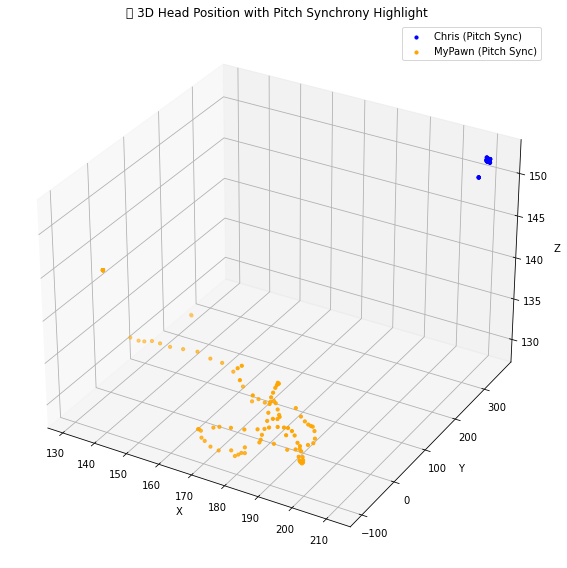

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("🧭 3D Head Position with Pitch Synchrony Highlight")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Sync data points only
sync_rows = merged[in_sync]

ax.scatter(sync_rows['position_x_chris'], sync_rows['position_y_chris'], sync_rows['position_z_chris'],
           color='blue', label='Chris (Pitch Sync)', s=10)
ax.scatter(sync_rows['position_x_pawn'], sync_rows['position_y_pawn'], sync_rows['position_z_pawn'],
           color='orange', label='MyPawn (Pitch Sync)', s=10)

ax.legend()
plt.tight_layout()
plt.savefig("output/3d_pitch_sync_points.png", dpi=300)
plt.show()


In [32]:
# Thresholds (you can tune these)
yaw_thresh_deg = 60
pitch_thresh_deg = 30

# Yaw difference (already circular)
yaw_diff = np.abs(merged['rotation_yaw_chris'] - merged['rotation_yaw_pawn']) % 360
yaw_diff = yaw_diff.apply(lambda x: min(x, 360 - x))

# Pitch difference
pitch_diff = np.abs(merged['rotation_pitch_chris'] - merged['rotation_pitch_pawn'])

# Boolean mask: both pitch and yaw within threshold
dual_sync_mask = (yaw_diff < yaw_thresh_deg) & (pitch_diff < pitch_thresh_deg)

# Add to DataFrame
merged['dual_sync'] = dual_sync_mask

# Percentage score
dual_sync_percent = dual_sync_mask.mean() * 100
print(f"✅ Dual Synchrony Score (Yaw + Pitch): {dual_sync_percent:.2f}% of session")


✅ Dual Synchrony Score (Yaw + Pitch): 0.00% of session


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0, flags=flags)


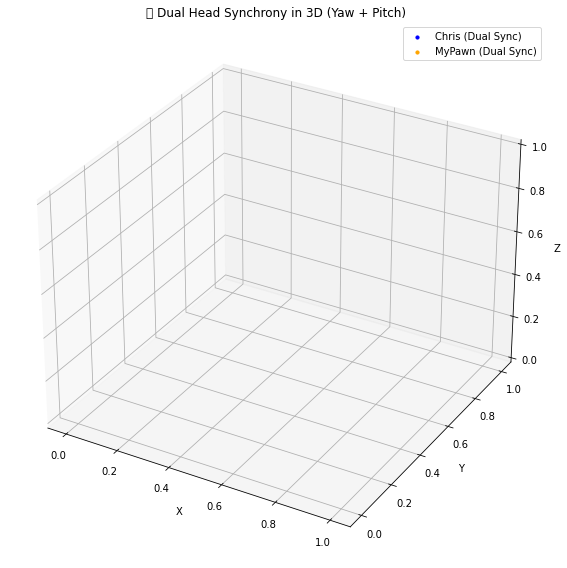

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("🧭 Dual Head Synchrony in 3D (Yaw + Pitch)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

sync3D = merged[merged['dual_sync']]

# Plot Chris
ax.scatter(sync3D['position_x_chris'], sync3D['position_y_chris'], sync3D['position_z_chris'],
           color='blue', label='Chris (Dual Sync)', s=10)

# Plot MyPawn
ax.scatter(sync3D['position_x_pawn'], sync3D['position_y_pawn'], sync3D['position_z_pawn'],
           color='orange', label='MyPawn (Dual Sync)', s=10)

ax.legend()
plt.tight_layout()
plt.savefig("output/3d_dual_sync_points.png", dpi=300)
plt.show()


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127919 missing from current font.
  font.set_text(s, 0, flags=flags)


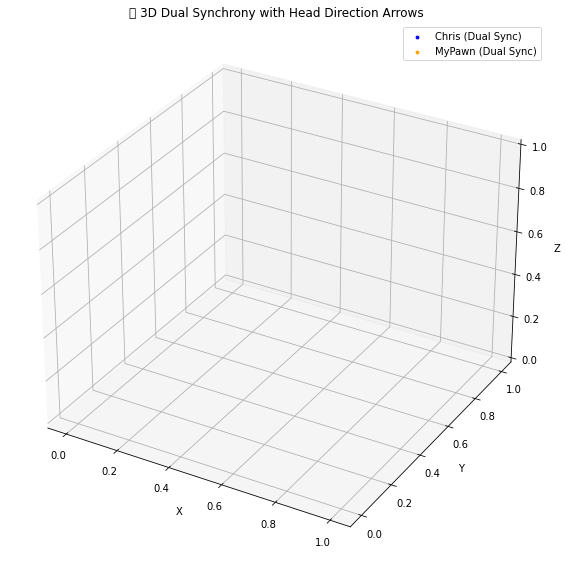

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("🎯 3D Dual Synchrony with Head Direction Arrows")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

arrow_len = 10
sync3D = merged[merged['dual_sync']]

for _, row in sync3D.iterrows():
    # Chris
    x1, y1, z1 = row['position_x_chris'], row['position_y_chris'], row['position_z_chris']
    yaw1 = np.radians(row['rotation_yaw_chris'])
    dx1, dy1 = np.cos(yaw1), np.sin(yaw1)
    ax.quiver(x1, y1, z1, dx1, dy1, 0, length=arrow_len, color='blue', linewidth=0.5)

    # MyPawn
    x2, y2, z2 = row['position_x_pawn'], row['position_y_pawn'], row['position_z_pawn']
    yaw2 = np.radians(row['rotation_yaw_pawn'])
    dx2, dy2 = np.cos(yaw2), np.sin(yaw2)
    ax.quiver(x2, y2, z2, dx2, dy2, 0, length=arrow_len, color='orange', linewidth=0.5)

# Scatter heads
ax.scatter(sync3D['position_x_chris'], sync3D['position_y_chris'], sync3D['position_z_chris'],
           color='blue', label='Chris (Dual Sync)', s=8)
ax.scatter(sync3D['position_x_pawn'], sync3D['position_y_pawn'], sync3D['position_z_pawn'],
           color='orange', label='MyPawn (Dual Sync)', s=8)

ax.legend()
plt.tight_layout()
plt.savefig("output/3d_dual_sync_with_arrows.png", dpi=300)
plt.show()


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128338 missing from current font.
  font.set_text(s, 0, flags=flags)


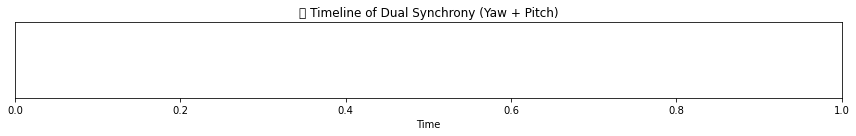

In [35]:
plt.figure(figsize=(12, 2))
sync_bar = merged['dual_sync'].astype(int)

plt.eventplot(merged['time'][sync_bar == 1], colors='green', lineoffsets=0.5, linewidths=2)
plt.title("🕒 Timeline of Dual Synchrony (Yaw + Pitch)")
plt.xlabel("Time")
plt.yticks([])
plt.tight_layout()
plt.savefig("output/dual_sync_timeline_bars.png", dpi=300)
plt.show()


In [36]:
# Parameters
min_duration_sec = 0.5  # minimum time (in seconds) for an episode to count

# Get sampling interval
time_vals = merged['time'].values
frame_deltas = np.diff(time_vals)
median_dt = np.median(frame_deltas) if len(frame_deltas) > 0 else 0.033  # fallback: 30 fps

# Convert boolean mask to 1/0
sync_binary = merged['dual_sync'].astype(int).values

# Find change points
episodes = []
start_idx = None

for i in range(len(sync_binary)):
    if sync_binary[i] == 1 and start_idx is None:
        start_idx = i
    elif sync_binary[i] == 0 and start_idx is not None:
        end_idx = i - 1
        duration = (end_idx - start_idx + 1) * median_dt
        if duration >= min_duration_sec:
            episodes.append((merged['time'].iloc[start_idx], merged['time'].iloc[end_idx]))
        start_idx = None

# Catch case where it ends with a sync episode
if start_idx is not None:
    end_idx = len(sync_binary) - 1
    duration = (end_idx - start_idx + 1) * median_dt
    if duration >= min_duration_sec:
        episodes.append((merged['time'].iloc[start_idx], merged['time'].iloc[end_idx]))

# Display
print("🧠 Synchrony Episodes (Yaw + Pitch):")
for i, (start, end) in enumerate(episodes):
    print(f" - Episode {i+1}: {start:.2f}s → {end:.2f}s  ({end - start:.2f}s)")


🧠 Synchrony Episodes (Yaw + Pitch):


In [37]:
episodes_df = pd.DataFrame(episodes, columns=['start_time', 'end_time'])
episodes_df['duration_sec'] = episodes_df['end_time'] - episodes_df['start_time']

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128257 missing from current font.
  font.set_text(s, 0, flags=flags)


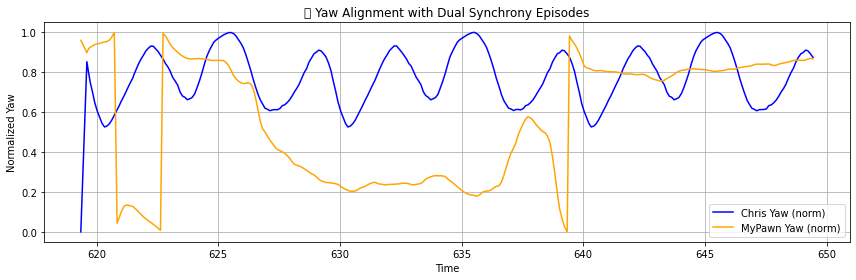

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0, flags=flags)


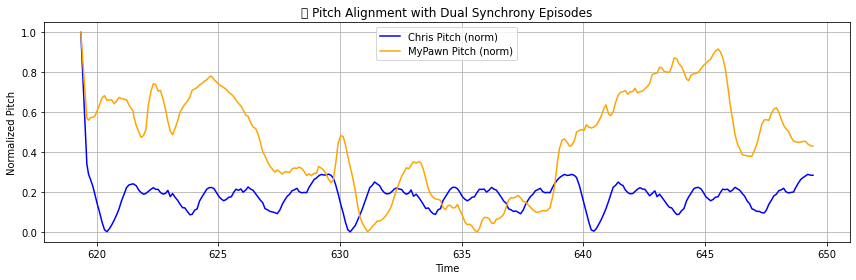

In [38]:
# Reuse previously normalized signals (or normalize again if needed)
yaw_chris = normalize(merged['rotation_yaw_chris'])
yaw_pawn = normalize(merged['rotation_yaw_pawn'])

pitch_chris = normalize(merged['rotation_pitch_chris'])
pitch_pawn = normalize(merged['rotation_pitch_pawn'])

time = merged['time']

# Plot 1: Yaw
plt.figure(figsize=(12, 4))
plt.plot(time, yaw_chris, label='Chris Yaw (norm)', color='blue')
plt.plot(time, yaw_pawn, label='MyPawn Yaw (norm)', color='orange')
for (start, end) in episodes:
    plt.axvspan(start, end, color='green', alpha=0.2)
plt.title("🔁 Yaw Alignment with Dual Synchrony Episodes")
plt.xlabel("Time")
plt.ylabel("Normalized Yaw")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("output/yaw_sync_episodes.png", dpi=300)
plt.show()

# Plot 2: Pitch
plt.figure(figsize=(12, 4))
plt.plot(time, pitch_chris, label='Chris Pitch (norm)', color='blue')
plt.plot(time, pitch_pawn, label='MyPawn Pitch (norm)', color='orange')
for (start, end) in episodes:
    plt.axvspan(start, end, color='green', alpha=0.2)
plt.title("🎚 Pitch Alignment with Dual Synchrony Episodes")
plt.xlabel("Time")
plt.ylabel("Normalized Pitch")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("output/pitch_sync_episodes.png", dpi=300)
plt.show()


In [39]:
metric = 'head_dist'  # or 'speed_chris' or 'cosine_sim'
label = 'Head Distance'  # change label depending on metric


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


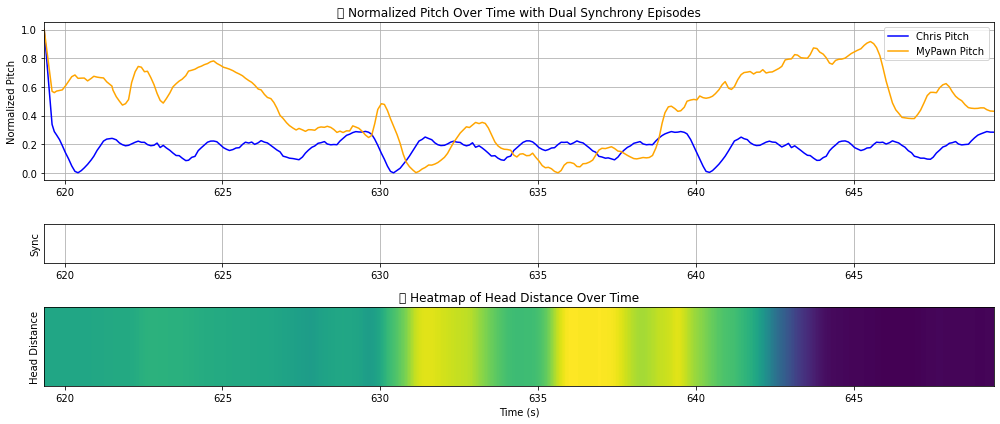

In [40]:
import matplotlib.gridspec as gridspec

# Choose metric to show in heatmap
metric = 'head_dist'  # or 'speed_chris', 'speed_pawn', 'cosine_sim'
label = 'Head Distance'

# Normalize pitch for waveform plot
pitch_chris = normalize(merged['rotation_pitch_chris'])
pitch_pawn = normalize(merged['rotation_pitch_pawn'])

# Binary timeline for synchrony
timeline_bar = merged['dual_sync'].astype(int).values
time = merged['time'].values
metric_vals = normalize(merged[metric].values)

# === PLOT ===
fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 0.5, 1])  # waveform, timeline, heatmap

# --- (1) Waveform: Normalized Pitch ---
ax0 = plt.subplot(gs[0])
ax0.plot(time, pitch_chris, label="Chris Pitch", color='blue')
ax0.plot(time, pitch_pawn, label="MyPawn Pitch", color='orange')
for (start, end) in episodes:
    ax0.axvspan(start, end, color='green', alpha=0.2)
ax0.set_title("🎚 Normalized Pitch Over Time with Dual Synchrony Episodes")
ax0.set_ylabel("Normalized Pitch")
ax0.legend()
ax0.grid(True)

# --- (2) Timeline bar (Synchrony ON/OFF) ---
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.eventplot(time[timeline_bar == 1], colors='green', lineoffsets=0.5, linewidths=2)
ax1.set_yticks([])
ax1.set_ylabel("Sync")
ax1.grid(True)

# --- (3) Heatmap bar of distance/speed/etc ---
ax2 = plt.subplot(gs[2], sharex=ax0)
ax2.imshow(metric_vals[np.newaxis, :], aspect="auto", cmap="viridis",
           extent=[time[0], time[-1], 0, 1])
ax2.set_yticks([])
ax2.set_xlabel("Time (s)")
ax2.set_ylabel(label)
ax2.set_title(f"🔥 Heatmap of {label} Over Time")

plt.tight_layout()
plt.savefig("output/pitch_combo_wave_timeline_heatmap.png", dpi=300)
plt.show()


In [41]:
# --- Add pitch difference and average distance ---
merged['pitch_diff'] = np.abs(merged['rotation_pitch_chris'] - merged['rotation_pitch_pawn'])
merged['yaw_diff'] = np.abs((merged['rotation_yaw_chris'] - merged['rotation_yaw_pawn']) % 360)
merged['yaw_diff'] = merged['yaw_diff'].apply(lambda x: min(x, 360 - x))

avg_pitch_diff = merged['pitch_diff'].mean()
avg_yaw_diff = merged['yaw_diff'].mean()
avg_head_dist = merged['head_dist'].mean()

sync_percent = merged['dual_sync'].mean() * 100
episode_count = len(episodes)


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127898 missing from current font.
  font.set_text(s, 0, flags=flags)


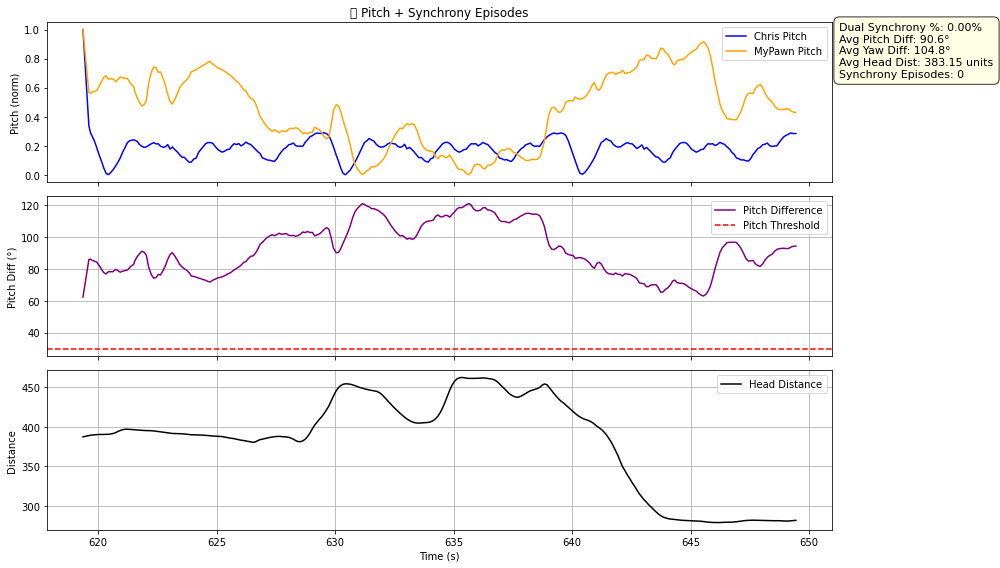

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(14, 8), sharex=True)

# --- Waveform plot ---
ax[0].plot(time, pitch_chris, label="Chris Pitch", color='blue')
ax[0].plot(time, pitch_pawn, label="MyPawn Pitch", color='orange')
for (start, end) in episodes:
    ax[0].axvspan(start, end, color='green', alpha=0.2)
ax[0].set_ylabel("Pitch (norm)")
ax[0].legend()
ax[0].set_title("🎚 Pitch + Synchrony Episodes")

# --- Pitch difference ---
ax[1].plot(time, merged['pitch_diff'], label="Pitch Difference", color='purple')
ax[1].axhline(30, color='red', linestyle='--', label="Pitch Threshold")
ax[1].set_ylabel("Pitch Diff (°)")
ax[1].legend()
ax[1].grid(True)

# --- Head Distance ---
ax[2].plot(time, merged['head_dist'], label="Head Distance", color='black')
ax[2].set_ylabel("Distance")
ax[2].set_xlabel("Time (s)")
ax[2].legend()
ax[2].grid(True)

# --- Summary text box ---
summary_text = (
    f"Dual Synchrony %: {sync_percent:.2f}%\n"
    f"Avg Pitch Diff: {avg_pitch_diff:.1f}°\n"
    f"Avg Yaw Diff: {avg_yaw_diff:.1f}°\n"
    f"Avg Head Dist: {avg_head_dist:.2f} units\n"
    f"Synchrony Episodes: {episode_count}"
)

props = dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8)
ax[0].text(1.01, 1.0, summary_text, transform=ax[0].transAxes,
           fontsize=11, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig("output/quantified_synchrony_plot.png", dpi=300)
plt.show()


In [43]:
min_episode_duration = 1.0  # seconds

# Classify episodes by length
colored_episodes = []
for start, end in episodes:
    duration = end - start
    color = 'green' if duration >= min_episode_duration else 'gold'
    colored_episodes.append((start, end, color))


In [44]:
min_episode_duration = 1.0  # seconds

# Classify episodes by length
colored_episodes = []
for start, end in episodes:
    duration = end - start
    color = 'green' if duration >= min_episode_duration else 'gold'
    colored_episodes.append((start, end, color))


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129517 missing from current font.
  font.set_text(s, 0, flags=flags)


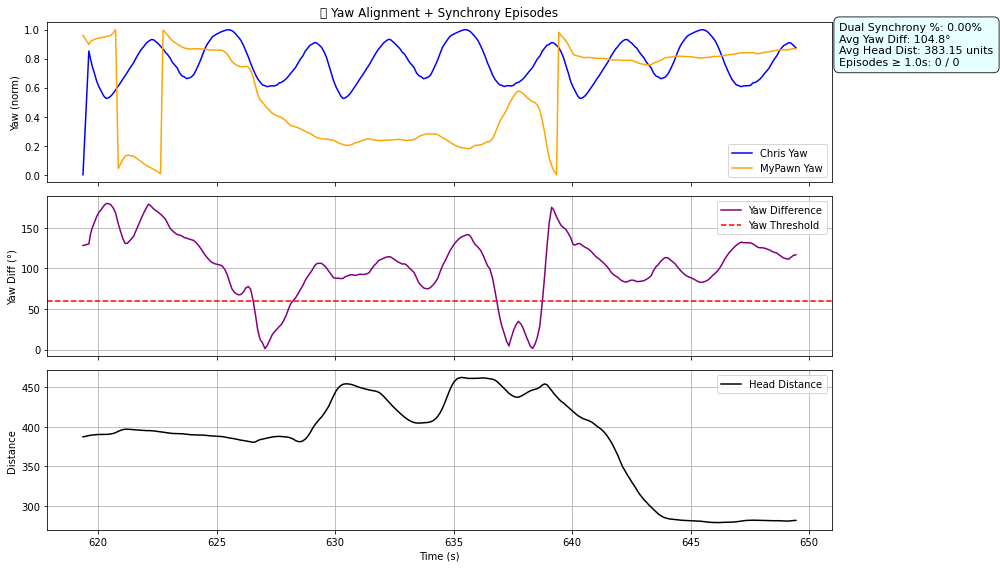

In [45]:
fig, ax = plt.subplots(3, 1, figsize=(14, 8), sharex=True)

# --- (1) Normalized Yaw Waveform ---
ax[0].plot(time, yaw_chris, label="Chris Yaw", color='blue')
ax[0].plot(time, yaw_pawn, label="MyPawn Yaw", color='orange')
for start, end, color in colored_episodes:
    ax[0].axvspan(start, end, color=color, alpha=0.2)
ax[0].set_ylabel("Yaw (norm)")
ax[0].legend()
ax[0].set_title("🧭 Yaw Alignment + Synchrony Episodes")

# --- (2) Yaw Difference ---
ax[1].plot(time, merged['yaw_diff'], label="Yaw Difference", color='purple')
ax[1].axhline(60, color='red', linestyle='--', label="Yaw Threshold")
ax[1].set_ylabel("Yaw Diff (°)")
ax[1].legend()
ax[1].grid(True)

# --- (3) Head Distance or Other Metric ---
ax[2].plot(time, merged['head_dist'], label="Head Distance", color='black')
ax[2].set_ylabel("Distance")
ax[2].set_xlabel("Time (s)")
ax[2].legend()
ax[2].grid(True)

# --- Summary Box ---
summary_text = (
    f"Dual Synchrony %: {sync_percent:.2f}%\n"
    f"Avg Yaw Diff: {avg_yaw_diff:.1f}°\n"
    f"Avg Head Dist: {avg_head_dist:.2f} units\n"
    f"Episodes ≥ {min_episode_duration:.1f}s: "
    f"{sum(end-start >= min_episode_duration for start,end in episodes)} / {len(episodes)}"
)

props = dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.8)
ax[0].text(1.01, 1.0, summary_text, transform=ax[0].transAxes,
           fontsize=11, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.savefig("output/yaw_synchrony_annotated.png", dpi=300)
plt.show()


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# ---------- SETTINGS ---------- #
folder_path = r"C:\Users\bmoha\Desktop\DataCollection\1060\heat_logs\2025-6-5_13161"
output_path = os.path.join(folder_path, "output_synchrony")
os.makedirs(output_path, exist_ok=True)

# Synchrony thresholds
yaw_thresh = 40      # degrees
pitch_thresh = 30    # degrees
dist_thresh = 50     # cm or units depending on scale

# Which files to use
file_list = [f for f in os.listdir(folder_path) if f.endswith(".csv") and "PoseDataManager" in f]
file_list = sorted(file_list)

# Store synchrony results
all_synchrony = []

# ---------- FUNCTIONS ---------- #

def angular_diff(a, b):
    diff = abs(a - b) % 360
    return np.minimum(diff, 360 - diff)

def load_and_filter(filepath):
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    df = df[['time', 'position_x', 'position_y', 'position_z',
             'rotation_roll', 'rotation_pitch', 'rotation_yaw', 'Aname']]
    return df

def extract_parts(df, part_name):
    return df[df['Aname'] == part_name].copy().sort_values(by='time')

def compute_sync_metrics(dfA, dfB, label):
    dfA = dfA.rename(columns={
        'position_x': f'{label}_x_A',
        'position_y': f'{label}_y_A',
        'position_z': f'{label}_z_A',
        'rotation_yaw': f'{label}_yaw_A',
        'rotation_pitch': f'{label}_pitch_A',
        'time': 'time'
    })
    dfB = dfB.rename(columns={
        'position_x': f'{label}_x_B',
        'position_y': f'{label}_y_B',
        'position_z': f'{label}_z_B',
        'rotation_yaw': f'{label}_yaw_B',
        'rotation_pitch': f'{label}_pitch_B',
        'time': 'time'
    })
    merged = pd.merge(dfA, dfB, on='time')

    merged[f'{label}_yaw_diff'] = angular_diff(merged[f'{label}_yaw_A'], merged[f'{label}_yaw_B'])
    merged[f'{label}_pitch_diff'] = abs(merged[f'{label}_pitch_A'] - merged[f'{label}_pitch_B'])

    merged[f'{label}_dist'] = np.linalg.norm(
        merged[[f'{label}_x_A', f'{label}_y_A', f'{label}_z_A']].values -
        merged[[f'{label}_x_B', f'{label}_y_B', f'{label}_z_B']].values, axis=1
    )

    merged[f'{label}_synchronized'] = (
        (merged[f'{label}_yaw_diff'] < yaw_thresh) &
        (merged[f'{label}_pitch_diff'] < pitch_thresh) &
        (merged[f'{label}_dist'] < dist_thresh)
    )

    return merged

# ---------- MAIN LOOP ---------- #

for fname in file_list:
    file_path = os.path.join(folder_path, fname)
    df = load_and_filter(file_path)

    head_A = extract_parts(df, "BP_Chris_28_Head")
    head_B = extract_parts(df, "myMRPawn_C_2147482403_Head")
    wristL_A = extract_parts(df, "BP_Chris_28_WristLeft")
    wristL_B = extract_parts(df, "myMRPawn_C_2147482403_WristLeft")
    wristR_A = extract_parts(df, "BP_Chris_28_WristRight")
    wristR_B = extract_parts(df, "myMRPawn_C_2147482403_WristRight")

    if head_A.empty or head_B.empty:
        print(f"⚠️ Skipped {fname}: Missing head data")
        continue

    # Compute metrics for each body part
    sync_head = compute_sync_metrics(head_A, head_B, "head")
    sync_L = compute_sync_metrics(wristL_A, wristL_B, "wristL") if not wristL_A.empty and not wristL_B.empty else None
    sync_R = compute_sync_metrics(wristR_A, wristR_B, "wristR") if not wristR_A.empty and not wristR_B.empty else None

    sync_df = sync_head.copy()
    if sync_L is not None:
        sync_df = pd.merge(sync_df, sync_L[['time', 'wristL_synchronized']], on='time', how='left')
    if sync_R is not None:
        sync_df = pd.merge(sync_df, sync_R[['time', 'wristR_synchronized']], on='time', how='left')

    # Compute overall synchrony
    sync_df['sync_score'] = sync_df[
        ['head_synchronized',
         'wristL_synchronized',
         'wristR_synchronized']
    ].sum(axis=1, skipna=True) / 3

    all_synchrony.append(sync_df)

    # Plot synchrony timeline
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.plot(sync_df['time'], sync_df['sync_score'], color='green', label='Synchrony Score')
    ax.fill_between(sync_df['time'], 0, sync_df['sync_score'], where=sync_df['sync_score'] > 0.66, color='green', alpha=0.4, label='High Synchrony')
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Synchrony Timeline: {fname}')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Sync Score')
    ax.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, fname.replace('.csv', '_synchrony.png')))
    plt.close()

    print(f"✅ Processed: {fname}")

# ---------- SUMMARY ---------- #
summary_df = pd.concat(all_synchrony, ignore_index=True)
summary_df.to_csv(os.path.join(output_path, "full_synchrony_log.csv"), index=False)
print("✅ All synchrony data saved to:", output_path)


⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.33.22.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.35.02.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.36.43.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.38.23.csv: Missing head data
✅ Processed: PoseDataManager_rawdata_2025.06.05-14.40.06.csv
✅ Processed: PoseDataManager_rawdata_2025.06.05-14.41.46.csv
✅ Processed: PoseDataManager_rawdata_2025.06.05-14.43.26.csv
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.45.06.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.46.47.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.48.27.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.54.36.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.56.18.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_2025.06.05-14.57.58.csv: Missing head data
⚠️ Skipped PoseDataManager_rawdata_20

C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0, flags=flags)


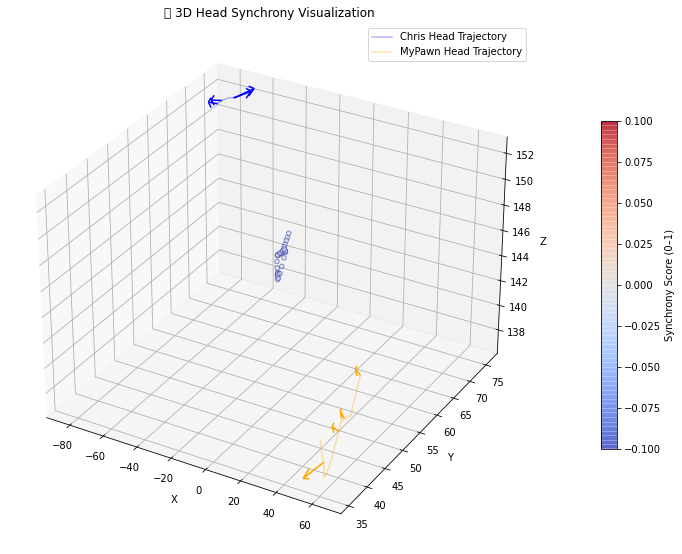

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Select a file to visualize (you can loop this too)
vis_df = sync_df.copy()

# Normalize sync score for color map
norm_score = vis_df['sync_score'].fillna(0).clip(0, 1)

# 3D Plot: Trajectories of heads
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Head positions
xA, yA, zA = vis_df['head_x_A'], vis_df['head_y_A'], vis_df['head_z_A']
xB, yB, zB = vis_df['head_x_B'], vis_df['head_y_B'], vis_df['head_z_B']

# Color by synchrony score
colors = cm.viridis(norm_score)

# Plot trajectories
ax.plot(xA, yA, zA, color='blue', alpha=0.3, label="Chris Head Trajectory")
ax.plot(xB, yB, zB, color='orange', alpha=0.3, label="MyPawn Head Trajectory")

# Scatter points for synchrony
sc = ax.scatter((xA + xB)/2, (yA + yB)/2, (zA + zB)/2, c=norm_score, cmap='coolwarm', s=20, alpha=0.6)

# Arrow vectors (head orientation)
arrow_scale = 5
for i in range(0, len(vis_df), 10):  # Skip for performance
    yawA = np.deg2rad(vis_df['head_yaw_A'].iloc[i])
    yawB = np.deg2rad(vis_df['head_yaw_B'].iloc[i])
    ax.quiver(xA.iloc[i], yA.iloc[i], zA.iloc[i],
              np.cos(yawA), np.sin(yawA), 0,
              color='blue', length=arrow_scale, normalize=True)
    ax.quiver(xB.iloc[i], yB.iloc[i], zB.iloc[i],
              np.cos(yawB), np.sin(yawB), 0,
              color='orange', length=arrow_scale, normalize=True)

# Labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("🌀 3D Head Synchrony Visualization")

# Legend & colorbar
ax.legend()
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label("Synchrony Score (0–1)")

plt.tight_layout()
plt.savefig(os.path.join(output_path, "3D_synchrony_plot.png"), dpi=300)
plt.show()


C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files (x86)\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127744 missing from current font.
  font.set_text(s, 0, flags=flags)


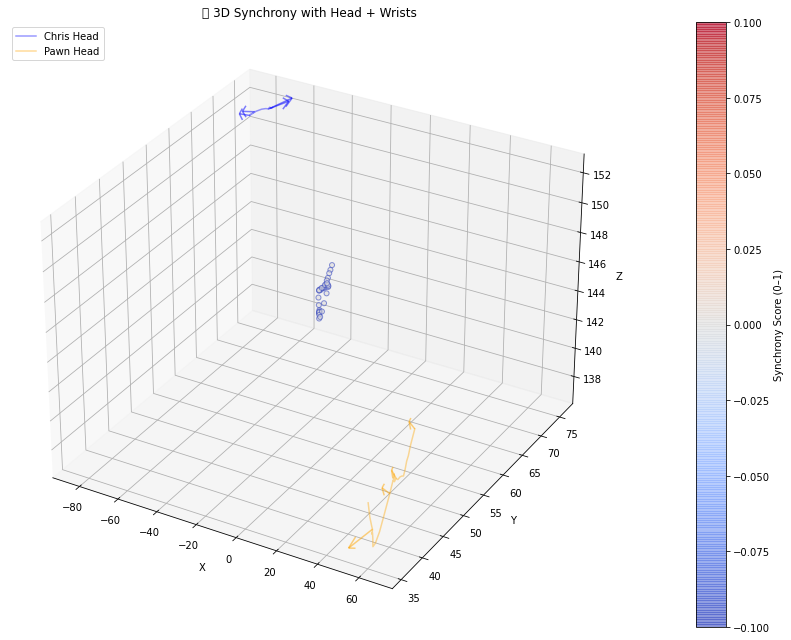

In [48]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Normalize synchrony score for coloring
sync_score = vis_df['sync_score'].fillna(0).clip(0, 1)
colors = cm.viridis(sync_score)

# Plot trajectories (Chris)
ax.plot(vis_df['head_x_A'], vis_df['head_y_A'], vis_df['head_z_A'], color='blue', label='Chris Head', alpha=0.4)
if 'wristL_x_A' in vis_df:
    ax.plot(vis_df['wristL_x_A'], vis_df['wristL_y_A'], vis_df['wristL_z_A'], color='cyan', label='Chris Wrist L', alpha=0.4)
if 'wristR_x_A' in vis_df:
    ax.plot(vis_df['wristR_x_A'], vis_df['wristR_y_A'], vis_df['wristR_z_A'], color='navy', label='Chris Wrist R', alpha=0.4)

# Plot trajectories (MyPawn)
ax.plot(vis_df['head_x_B'], vis_df['head_y_B'], vis_df['head_z_B'], color='orange', label='Pawn Head', alpha=0.4)
if 'wristL_x_B' in vis_df:
    ax.plot(vis_df['wristL_x_B'], vis_df['wristL_y_B'], vis_df['wristL_z_B'], color='gold', label='Pawn Wrist L', alpha=0.4)
if 'wristR_x_B' in vis_df:
    ax.plot(vis_df['wristR_x_B'], vis_df['wristR_y_B'], vis_df['wristR_z_B'], color='darkorange', label='Pawn Wrist R', alpha=0.4)

# Synchrony dots between heads
sc = ax.scatter(
    (vis_df['head_x_A'] + vis_df['head_x_B']) / 2,
    (vis_df['head_y_A'] + vis_df['head_y_B']) / 2,
    (vis_df['head_z_A'] + vis_df['head_z_B']) / 2,
    c=sync_score, cmap='coolwarm', s=25, alpha=0.6
)

# Optional: head arrows for yaw
arrow_scale = 5
for i in range(0, len(vis_df), 10):  # downsample
    yawA = np.deg2rad(vis_df['head_yaw_A'].iloc[i])
    yawB = np.deg2rad(vis_df['head_yaw_B'].iloc[i])
    ax.quiver(vis_df['head_x_A'].iloc[i], vis_df['head_y_A'].iloc[i], vis_df['head_z_A'].iloc[i],
              np.cos(yawA), np.sin(yawA), 0,
              color='blue', length=arrow_scale, alpha=0.5)
    ax.quiver(vis_df['head_x_B'].iloc[i], vis_df['head_y_B'].iloc[i], vis_df['head_z_B'].iloc[i],
              np.cos(yawB), np.sin(yawB), 0,
              color='orange', length=arrow_scale, alpha=0.5)

# Format
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("🌀 3D Synchrony with Head + Wrists")
ax.legend(loc='upper left')
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Synchrony Score (0–1)")

plt.tight_layout()
plt.savefig(os.path.join(output_path, "3D_synchrony_with_wrists.png"), dpi=300)
plt.show()
